<a href="https://colab.research.google.com/github/ITU-Business-Analytics-Team/Business_Analytics_for_Professionals/blob/main/Part%20II%20%3A%20Business%20Applications/Chapter%2014%3A%20Human%20Resources%20Analytics/14_2_Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Human Resources Analytics**
## Employee Attrition


### PREDICTING EMPLOYEE ATTRITION USING MACHINE LEARNING

In this usecase a machine learning model was built to predict employee attrition by using a employee data set. The data set is a modified version of IBM HR Analytics Employee Attrition Data [(1)](https://colab.research.google.com/drive/1rH3tpZChczBJERIp1JbVQ5asbru6Iz3C#scrollTo=iC2erYZNnQe1&line=1&uniqifier=1) and is available from this [link](https://drive.google.com/file/d/1R6kBn72Nmy6iwzIWF0DGta0l6amY2xd2/view?usp=sharing).

**Problem Definition:** What are the attrition risk of my current employees? What are the factors that effect employee attrition?

### **IMPORTING REQUIRED LIBRARIES AND COMPONENTS**

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)


### **IMPORT DATA**

In [ ]:
url = "https://drive.google.com/file/d/1J6wA_shMJ9RZtkluvuSlLnbWoFD-6ynL/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head()

,EmpID,Age,DailyRate,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,TrainingTimesLastYear,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Tenure,TotalExperience,WageRate,WorkingModel,OrgFunction,PositionEngagement,Attrition
0,AX101,29.0,1328,1.54,3,2669.0,1.0,2,4,1.0,5.0,0,6.0,5.0,5.0,0,0,1,3,0
1,AX102,44.0,343,8.37,3,2230.0,6.0,3,3,1.0,2.0,1,2.0,3.0,7.0,1,1,1,2,0
2,AX103,36.0,827,28.40,4,5219.0,1.0,3,2,4.0,8.0,3,7.0,17.0,14.0,0,2,1,2,1
3,AX104,41.0,1179,10.76,3,8011.0,4.0,2,1,4.0,9.0,8,10.0,9.0,10.0,0,0,2,1,0
4,AX105,59.0,1435,23.39,3,7108.0,7.0,3,4,4.0,14.0,7,10.0,19.0,27.0,0,0,2,5,0


### **EXPLORATORY DATA ANALYSIS**

In [ ]:
df.shape

(1102, 20)

The data set includes 20 variables of 1102 employees in a company. List of variables and their definitions can be seen below:


Variable Name  | Variable Description 
-------------------|------------------
EmpID       | Unique ID of Employees
Age       | Age of the employee
Daily rate| Daily wage rate of an employee 
Distance from home       |The distance between the household and company location
Education|Education level of the employee (1: High School,3: Undergraduate, 4:Masters, 5:PhD)
MonthlyIncome       |Monthly wage of an employee 
NumCompaniesWorked       |Number of companies that employee worked before
PerformanceRating       |Last performance score of the employee
RelationshipSatisfaction       |Satisfaction score of the employee
TrainingTimesLastYear       |Number of trainings employee took during last year
YearsInCurrentRole       |How many employee spent in the current role
YearsSinceLastPromotion      |How many years passed since the last promotion
YearsWithCurrManager      |How many years passed with the current manager
Tenure       |Total number of years within the company
TotalExperience       |Total number of years in the work life
WageRate       |Comparison of the wage with the company mean
WorkingModel       |Working model of the employee (Hybrid, working in the office, working remote)
OrgFunction       |Organizational department of the employee
PositionEngagement|Engagement score for  the position
Attrition|Active or former employee (0: Active, 1:Former Employee)

For the next step unnecessary variables were removed and a brief explorotary data analysis was conducted. Since the main goal of this analytics model was to predict attrition risk of employees and identify the reasons behind attrition, a bi-variate analysis was proceeded to understand the distribution of attrition.

In order to conduct the bi-variate analysis, the data types of the features were modified and checked. The data set included of 4 categorical, 16 numeric and 1 string feature. Since the feature 'EmpID' represents the unique ID of each employee was removed from the analysis. Additionally, null values were checked for each column. It was seen that the data set didn't include any null value.

In [ ]:
# Transform categorical features

df["Education"] = df["Education"].astype("category")
df["OrgFunction"] = df["OrgFunction"].astype("category")
df["WorkingModel"] = df["WorkingModel"].astype("category")
df["WageRate"] = df["WageRate"].astype("category")
#df["Attrition"] = df["Attrition"].astype("category")


In [ ]:
# Check data types of the data set
df.dtypes

EmpID                         object
Age                          float64
DailyRate                      int64
DistanceFromHome             float64
Education                   category
MonthlyIncome                float64
NumCompaniesWorked           float64
PerformanceRating              int64
RelationshipSatisfaction       int64
TrainingTimesLastYear        float64
YearsInCurrentRole           float64
YearsSinceLastPromotion        int64
YearsWithCurrManager         float64
Tenure                       float64
TotalExperience              float64
WageRate                    category
WorkingModel                category
OrgFunction                 category
PositionEngagement             int64
Attrition                      int64
dtype: object

In [ ]:
#Check Null values 

df.isna().sum()

EmpID                       0
Age                         0
DailyRate                   0
DistanceFromHome            0
Education                   0
MonthlyIncome               0
NumCompaniesWorked          0
PerformanceRating           0
RelationshipSatisfaction    0
TrainingTimesLastYear       0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Tenure                      0
TotalExperience             0
WageRate                    0
WorkingModel                0
OrgFunction                 0
PositionEngagement          0
Attrition                   0
dtype: int64

0    84.392015
1    15.607985
Name: Attrition, dtype: float64

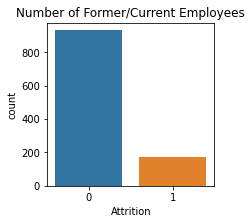

In [ ]:
# Plot target variable attrition value counts

plt.figure(figsize=(3,3))
plt.title('Number of Former/Current Employees')
sns.countplot(x="Attrition", data=df)

df['Attrition'].value_counts()/df['Attrition'].count()*100

Analysis of attrition level showed that the attrition level for the data set is **%15.6**. This result showed that the data set was slightly imbalanced.

In [ ]:
df.groupby("Attrition").describe()

Age                                    ... PositionEngagement                    
           count       mean        std   min   25%  ...                min  25%  50%  75%  max
Attrition                                           ...                                       
0          930.0  37.582796   9.102699  17.0  31.0  ...                1.0  1.0  2.0  3.0  5.0
1          172.0  33.912791  10.366301  16.0  27.0  ...                1.0  2.0  2.0  5.0  5.0

[2 rows x 112 columns]

The descriptive statistics of attrition and all of the other possible variables can be seen above. In order to compare the distribution of each variable among employees who left the company (attrition = 1) and who stayed (attrition = 0), boxplots were created.

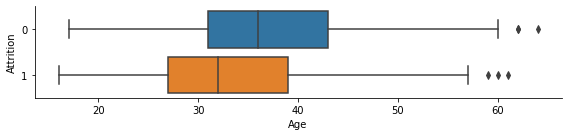

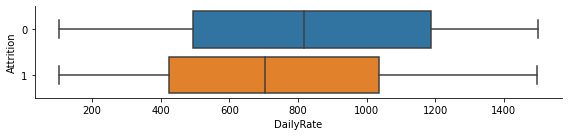

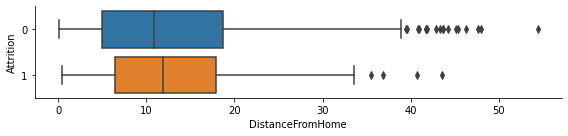

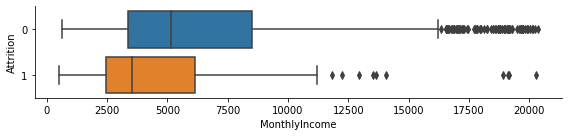

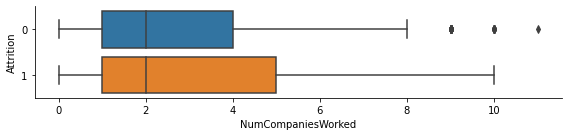

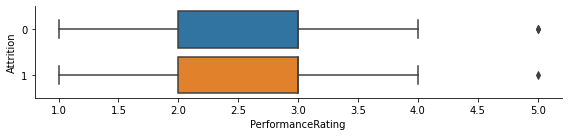

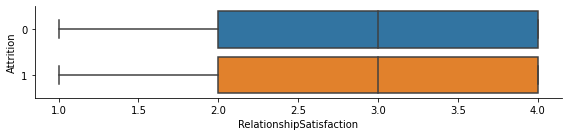

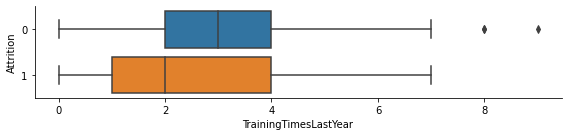

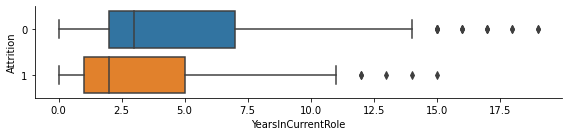

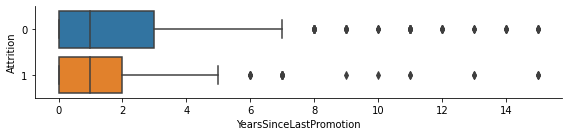

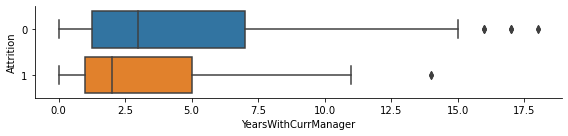

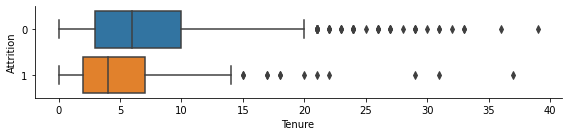

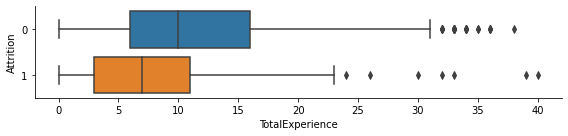

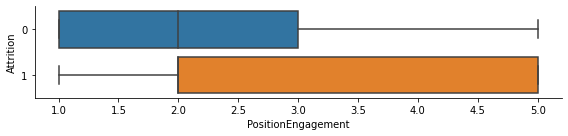

In [ ]:
#Plot Histograms for Numeric Variables

num = df.select_dtypes(include=np.number)  # Get numeric columns

for col in num.drop("Attrition",axis=1):
  sns.catplot(x=col, y="Attrition",
                kind="box", orient="h", height=2, aspect=4,
                data=df)

Bi-variate analysis of the employee numeric features and target column **"Attrition"** provided some critical outputs about the distribution of the data. Major findings from boxplots and descriptive statistics outputs could be summarized as: 


* %75 of employees who left the company were younger than 39. The descriptive statistics of the age feature show that, employees who left the company are slightly younger than the ones who stayed.  
*   The comparison of monthly income and attrition showed that, employees who left the company earn less than the ones who stayed.
*   %75 of all employees who left the company have an tenure less than 5.  
*   The employees who stayed in the company have more total experience than the ones who left.

Secondly, a similiar analysis was done for the categorical features. This time, attirition rates were plotted for each category by using countplots. 



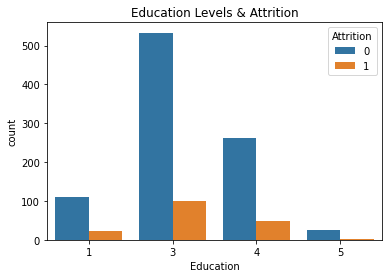

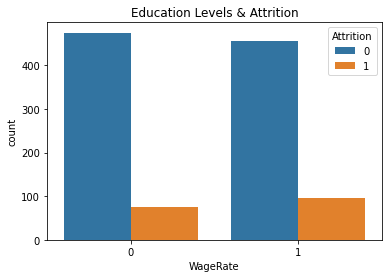

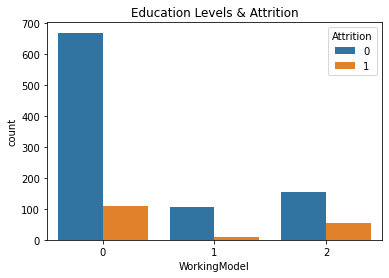

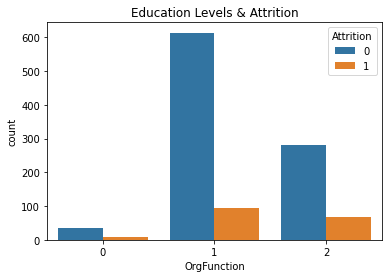

In [ ]:
# Descriptive analysis of the categorical features
cat = df.select_dtypes(include="category")  # Get categoric columns
cat_colnames = cat.columns

for col in cat_colnames:

  sns.countplot(x=col, hue="Attrition",data = df)
  plt.title('Education Levels & Attrition')
  plt.show()


In [ ]:
# Comparison of attrition level for categorical variables

cat = df.select_dtypes(include="category")  # Get categoric columns
cat_colnames = cat.columns

for col in cat_colnames:
  attrition_count = df.groupby(['Attrition',col])['EmpID'].count().rename("count")
  attrition_level = (attrition_count / attrition_count.groupby(level=1).sum()*100).round(1)

  print(attrition_level[attrition_level.index.isin([1], level=0)])

Attrition  Education
1          1            17.3
           3            15.7
           4            15.5
           5             7.4
Name: count, dtype: float64
Attrition  WageRate
1          0           13.6
           1           17.6
Name: count, dtype: float64
Attrition  WorkingModel
1          0               14.1
           1                7.9
           2               25.4
Name: count, dtype: float64
Attrition  OrgFunction
1          0              18.6
           1              13.4
           2              19.7
Name: count, dtype: float64


Bi-variate analysis through count plots for the former and current employees for each categorical variable and attrition ratio comparison provided that; 

*   For the education level=1 attrition level **%17.3** is slightly higher than overall ratio (**%15.6**)
* For the education level=5 attrition level **%7.4** is lower than the overalll ratio (**%15.60**)
* The employees whose wages are less than the company mean (Wagerate=1) have slightly higher attrion ratio (**%17.9**) than the other ones
* The employees who are working remote (Working Model=2) have higher attrition rate (**%25.4**) than the other groups
* Employees working in the office (Working Model = 1) have the lowest attrition level when compared with the other two working models.
* Employees from department "0" and "2" have slightly higher attrition ratios than the expected mean. 
   
As a result of the exploratory data analysis, it is possible to say that the all of the features within the data set could be used for modeling. Possible signs of relations between target column **"Attrition"** and dependent variables such as as **"Age"**  , **"Monthly Income"**, **"Years in current role"**, **"Education Level"** and **"Working Model"** are possible predictors of attrition of employees. However, since these comparisons were conducted on variable level separately, the outputs of the model should be analyzed in order to understand the complex relationships.

For the next step, a classification model was applied in order to predict the attrition risk of current employees. All of the variables except "EmpID" was used as predictors and the variable "Attrition" was used as the target. 



# **MODEL DEVELOPMENT**
  ## **DATA PREPERATION**

In [ ]:
data = df.drop(columns="EmpID")

In [ ]:
# TRAIN - TEST SPLIT OF THE DATA

X= data.drop('Attrition',axis=1)
y=data['Attrition']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

In order to predict the employee attrition risk, 3 different machine learning algorithms were applied. These are: **Decision Tree, Random Forest and LightGbm**. The outputs of these models were compared and optimal model were chosen.

In [ ]:
# BUILD DECISION TREE CLASSIFICATION MODEL
model_dt = DecisionTreeClassifier()

model_dt.fit(X_train,y_train)

pred_dt = model_dt.predict(X_test)

print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       275
           1       0.32      0.38      0.35        56

    accuracy                           0.76       331
   macro avg       0.60      0.61      0.60       331
weighted avg       0.78      0.76      0.77       331



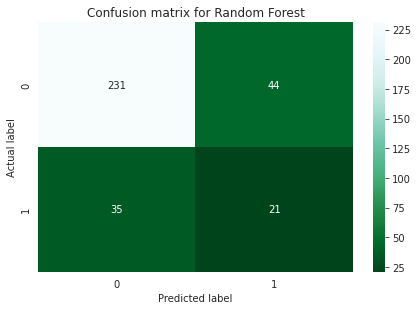

In [ ]:
# PLOT THE CONFUSION MATRIX FOR DECISION TREE MODEL

color = sns.color_palette()
sns.set_style("whitegrid")

plt.rcParams['figure.figsize'] = (6,4)
class_names = [1,0]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,pred_dt)), annot = True, cmap = 'BuGn_r',
           fmt = 'g')
plt.tight_layout()
plt.title('Confusion matrix for Random Forest', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# BUILD RANDOM FOREST CLASSIFICATION MODEL
model_rf = RandomForestClassifier()

model_rf.fit(X_train,y_train)

pred_rf = model_rf.predict(X_test)

print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90       275
           1       0.38      0.05      0.09        56

    accuracy                           0.82       331
   macro avg       0.61      0.52      0.50       331
weighted avg       0.76      0.82      0.77       331



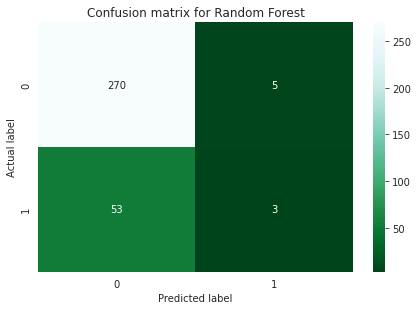

In [ ]:
# PLOT THE CONFUSION MATRIX FOR DECISION TREE MODEL

color = sns.color_palette()
sns.set_style("whitegrid")

plt.rcParams['figure.figsize'] = (6,4)
class_names = [1,0]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,pred_rf)), annot = True, cmap = 'BuGn_r',
           fmt = 'g')
plt.tight_layout()
plt.title('Confusion matrix for Random Forest', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# # BUILD LIGHTGBM CLASSIFICATION MODEL 

clf_lgb = lgb.LGBMClassifier()
clf_lgb.fit(X_train, y_train)

# predict the results
y_pred_lgb =clf_lgb.predict(X_test)

print(classification_report(y_test,y_pred_lgb))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       275
           1       0.59      0.18      0.27        56

    accuracy                           0.84       331
   macro avg       0.72      0.58      0.59       331
weighted avg       0.81      0.84      0.80       331



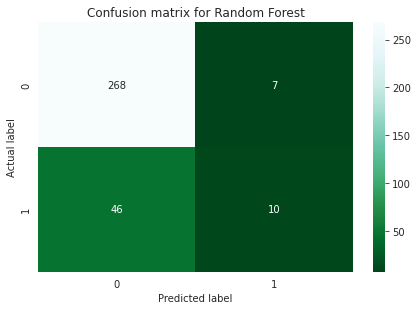

In [ ]:
# PLOT THE CONFUSION MATRIX FOR LIGHTGBM MODEL

color = sns.color_palette()
sns.set_style("whitegrid")

plt.rcParams['figure.figsize'] = (6,4)
class_names = [1,0]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred_lgb)), annot = True, cmap = 'BuGn_r',
           fmt = 'g')
plt.tight_layout()
plt.title('Confusion matrix for Random Forest', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In this study, 3 different machine learning algorithms were applied to the Attrition data set. 
The results showed that, **"LightGbm"** classifier outperformed other 2 algorithms. Since our data is imbalanced with an attrition rate of **%15.6** checking both accuracy and F1 scores are crucial to assess model performance.

* **Decision tree** model is a simpler model than random forest and lightgbm. Despite its simplicity, it outperformed the other two with a recall score **0.34** and F1 score **0.32**. However it's overall accuracy is worse than other two (**0.76**)
*   **Random Forest** model has a higher accuracy rate but the recall metric is considerably low (**0.09**). Nonetheless, F1 Score is **0.16** 
*  **Lightgbm** has a better F1 score (**0.27**) than Random Forest. Additionally, recall metric is also higher than random forest (**0.18**). Additionally in terms of accuracy it outperformed the other two with a Accuracy score of **0.84**

As a result, LightGbm algorithm was chosen to predict the employee attrition risk with best performance metrics.

For the next step, feature importance of the LightGbm model was calculated.
  

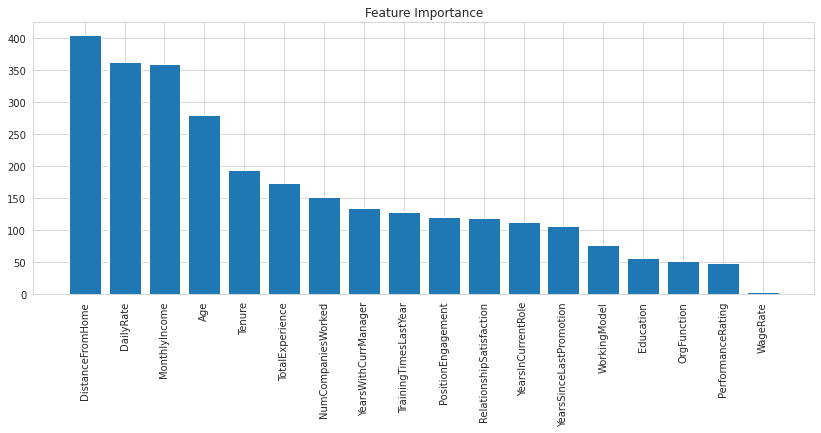

In [ ]:
# DEFINE THE FEATURE IMPORTANCE FOR THE LIGHTGBM CLASIFICATION MODEL

importance = clf_lgb.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importance)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]


# Create plot
plt.figure(figsize=(14,5))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importance[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

plt.show()

The feature importance plot showed that, **'Distance from Home', 'DailyRate' and 'MonthlyIncome'** are the most important 3 features for the classification model. 

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


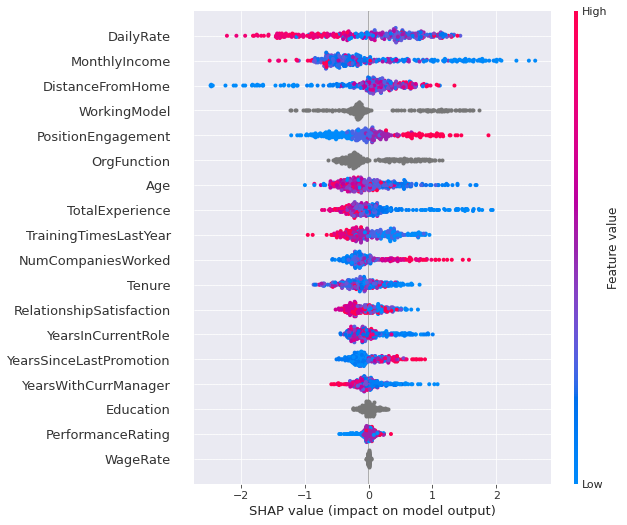

In [ ]:
!pip install shap
import shap 
import graphviz
sns.set_style('darkgrid') 
 
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(clf_lgb)
# obtain shap values for the first row of the test data
# obtain shap values for the test data
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)

Deep dive analysis with shap values show that; 
* If the Dailyrate decreases, the attrition risk of employees increase
* Lower monthly income increase the risk of attrition
* Low levels of distance from home decrease the risk of attrition

For the next step, the attrition risk of active employees were calculated using the decision tree model.

In [ ]:
# CALCULATE THE ATTRITION RISK FOR ACTIVE EMPLOYEES

data_active = data[data["Attrition"] == 0]
data_active.drop(columns =["Attrition"],inplace = True)

active_risk = clf_lgb.predict_proba(data_active)

data_active["RiskProbability"] = active_risk[:,1]


data_active[data_active["RiskProbability"] >= 0.5]

data_active.loc[data_active['RiskProbability'] >= 0.5, 'RiskClass'] = "High"
data_active.loc[(data_active['RiskProbability'] >= 0.3) & (data_active['RiskProbability'] < 0.5), 'RiskClass'] = "Medium"


data_active['RiskClass'].value_counts()

Medium    13
High       7
Name: RiskClass, dtype: int64

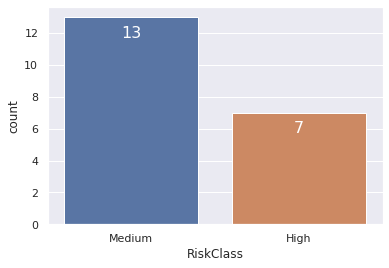

In [ ]:
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="RiskClass", data=data_active)


for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x()+0.4, p.get_height()-0.5),ha='center', va='top', color='white', size=16)

According to the outputs of the model, there are **13** employees with Medium Attrition Risk and **7** employees with High Attrition Risk.

# **REFERENCES**

(1) https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset